____    
    
**Название проекта:** Модель прогноза оттока клиентов
_____
**Описание исследования.**
Из «Бета-Банка» стали уходить клиенты. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
Необходимо спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.
_____
**Цель исследования.**
Подобрать модель с максимально большим значением f1 (среднее гармоническое полноты и точности). Необходимо довести долю правильных ответов по крайней мере до 0.59.
_____
**Задачи исследования.**
1. Подгрузить файл с данными и изучить общую информацию
2. Разделить исходные данные на выборки
3. Исследовать качество прогноза разных моделей
4. Улучшить качество моделей и провести новые расчеты
5. Проверить качество модели на тестовой выборке
_____
**Исходные данные.**
На входе у нас есть таблица где сведены исторические данные о поведении клиентов и расторжении договоров с банком. Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

В таблице представлены следующие данные:
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата
______

**Данное исследование разделим на несколько частей.**

***Часть 1. Подключение библиотек:***
* [1. Подключение библиотек.](#1-bullet)

***Часть 2. Подготовка данных:***
* [1. Первичный анализ данных.](#2-bullet)
* [2. Кодирование данных.](#3-bullet)
* [3. Разделение на выборки.](#4-bullet)
* [4. Масштабирование признаков.](#5-bullet)

***Часть 3. Исследование моделей:***
* [1. Модель дерево решений.](#6-bullet)
* [2. Модель логистической регрессии.](#7-bullet)
* [3. Модель случайный лес.](#8-bullet)

***Часть 4. Улучшение моделей:***
* [1. Взвешивание классов.](#9-bullet)
* [2. Увеличение выборки.](#10-bullet)
* [3. Уменьшение выборки.](#11-bullet)

***Часть 5. Тестирование модели:***
* [1. Тестирование модели.](#12-bullet)

***Часть 6. Общий вывод:***
* [1. Общий вывод.](#13-bullet)

<a id="1-bullet"></a>
## **Подключаемые библиотеки**

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# загрузка данных
try:
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Проект по клиентам банка/Churn.csv')
except:
  data = pd.read_csv('/datasets/Churn.csv')


## **Подготовка данных**

<a id="2-bullet"></a>
Напишем функцию, которая поможет провести первичный анализ данных.

In [ ]:
# чтобы все столбцы выводились на экран
pd.set_option('display.max_columns', None)

# функция первичного анализа
def first_analysis(df):
  columns = df.columns.tolist() # формируем список из названий столбцов

  for col in columns: # для каждого  выполняем следующие команды
    print("-"*60) # линия разделитель
    print(col) # печатаем названия столбца
    print('Тип данных:', df[col].dtypes) # выводим тип данных в этом столбце
    print(f'Количество пустых ячеек: {df[col].isna().sum()} ({df[col].isna().sum()/df.shape[0]*100}%)') # выводим количество пустых ячеек в абсолютных значениях, а также в процентах
    print('Уникальные значения', df[col].unique()) # выводим список уникальных значений
  # далее по всей таблице
  print()
  print('Количество явных дубликатов:', df.duplicated().sum()) # Выводим количество явных дубликатов
  print()
  print('Первые пять строк таблицы данных')
  print()
  display(df.head()) # печатаем первые пять строк таблицы
  print('\n'*2)
  display(df.describe()) # выводим статистическую информацию по каждому столбцу
  print('\n'*2)
  df.hist(figsize=(15, 20)); # строим гистограммы для каждой колонки
  print('\n'*2)
  display(df.corr().round(2)) # строим корреляционную матрицу
  print('\n'*2)
  pd.plotting.scatter_matrix(df, figsize=(12, 9)); # выводим корреляционную матрицу графически

------------------------------------------------------------
RowNumber
Тип данных: int64
Количество пустых ячеек: 0 (0.0%)
Уникальные значения [    1     2     3 ...  9998  9999 10000]
------------------------------------------------------------
CustomerId
Тип данных: int64
Количество пустых ячеек: 0 (0.0%)
Уникальные значения [15634602 15647311 15619304 ... 15584532 15682355 15628319]
------------------------------------------------------------
Surname
Тип данных: object
Количество пустых ячеек: 0 (0.0%)
Уникальные значения ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
------------------------------------------------------------
CreditScore
Тип данных: int64
Количество пустых ячеек: 0 (0.0%)
Уникальные значения [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.00,0.00,0.01,0.00,-0.01,-0.01,0.01,0.00,0.01,-0.01,-0.02
CustomerId,0.00,1.00,0.01,0.01,-0.02,-0.01,0.02,-0.01,0.00,0.02,-0.01
CreditScore,0.01,0.01,1.00,-0.00,-0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03
Age,0.00,0.01,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
Tenure,-0.01,-0.02,-0.00,-0.01,1.00,-0.01,0.01,0.03,-0.03,0.01,-0.02
Balance,-0.01,-0.01,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12
NumOfProducts,0.01,0.02,0.01,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05
HasCrCard,0.00,-0.01,-0.01,-0.01,0.03,-0.01,0.00,1.00,-0.01,-0.01,-0.01
IsActiveMember,0.01,0.00,0.03,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16
EstimatedSalary,-0.01,0.02,-0.00,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01


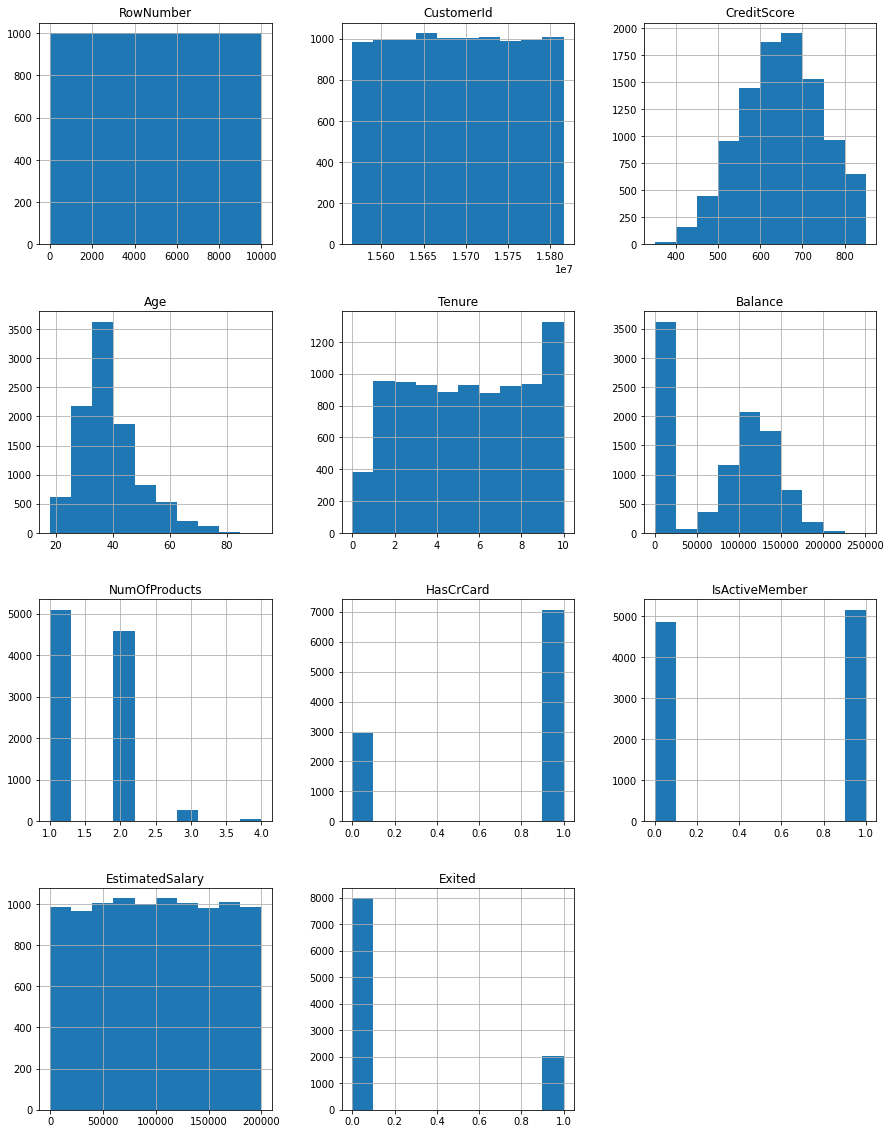

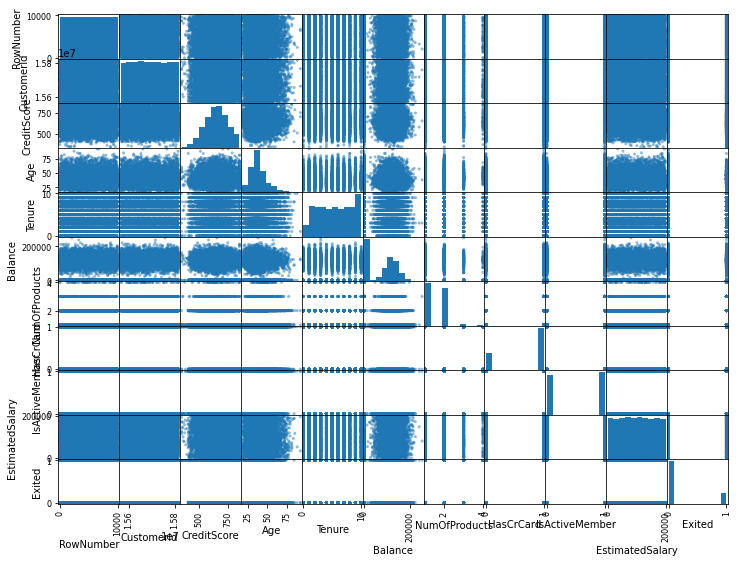

In [ ]:
# применяем функцию первичного анализа к нашим данным
first_analysis(data)

**Вывод:** В данных присутсвуют категориальные данные: фамилия, страна проживания, пол клиента. В целевом признаке (Exited - факт ухода клиента) присутствует дисбаланс. Первичный анализ данных показывает, что в данных присутствуют пропуски в колонке Tenure (количество лет клиент банка). Основная причина - технический сбой при передачи данных, т.к. эти данные не вносятся клиентом или оператором вручную, а вычисляется системой.

Возможные пути работы с пропусками:
1.   Заполнить медианным значением
2.   Заполнить случайными значениями из диапазаона возможных
3.   Удалить

Принимаем решение №3, т.к. предполагаем что предложенные варианты заполнения пустых ячеек исказять результат нашего анализа. При удалении мы потеряем всего лишь 9% данных.


In [ ]:
# удаляем строки с пропущенными значениями
data = data.dropna(subset=['Tenure'])
data['Tenure'] = data['Tenure'].astype(int)

In [ ]:
# переименовываем названия колонок
data.rename(columns={'RowNumber': 'row_number',
                     'CustomerId': 'customer_id',
                     'Surname': 'surname',
                     'CreditScore': 'credit_score',
                     'Geography': 'geography',
                     'Gender': 'gender',
                     'Age': 'age',
                     'Tenure': 'tenure',
                     'Balance': 'balance',
                     'NumOfProducts': 'num_of_products',
                     'HasCrCard': 'has_cr_card',
                     'IsActiveMember': 'is_active_member',
                     'EstimatedSalary': 'estimated_salary',
                     'Exited': 'exited'}, inplace=True)

In [ ]:
# удаляем не нужные столбцы
# удаляемые столбцы не несут практическо значимой информации
data_mod = data.drop(['row_number', 'customer_id', 'surname'], axis = 1)
data_mod.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<a id="3-bullet"></a>
Т.к. в данных присутсвуют категориальные данные, произведем их кодирование.

In [ ]:
# производим прямое кодирование, для того чтобы модель Логистической регрессии не выдавала ошибок
data_mod_ohe = pd.get_dummies(data_mod , drop_first=True)

In [ ]:
# введем значение random state
RANDOM_STATE = 55555

<a id="4-bullet"></a>
Произведем разделение исходных данных на выборки.

In [ ]:
target = data_mod_ohe['exited']
features = data_mod_ohe.drop('exited', axis=1)

features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.40, random_state=RANDOM_STATE, stratify=target)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.50, random_state=RANDOM_STATE, stratify=target_valid_test)

<a id="5-bullet"></a>
Произведем масштабирование признаков

In [ ]:
# проводим масштабирование признаков
scaler = StandardScaler()
numeric = ['credit_score', 'age', 'balance', 'estimated_salary']

scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

## **Исследование моделей**

<a id="6-bullet"></a>
Модель дерево решений

In [ ]:
# определяем лучшую модель дерево решений, путем подбора гиперпараметров церез цикл
best_model_decision = 0
best_result_decision = 0
best_depth = 0
best_split = 0
best_leaf = 0
best_auc_roc = 0

for depth in range(1,11, 1): # перебираем глубину дерева от 1 до 10
  for split in range(2,11, 1): # перебираем гиперпараметр определяющий минимальное количество объектов на узле дерева
    for leaf in range(1,11, 1): # перебираем минимальное количество объектов в нижних узлах
      model_decision = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf)
      model_decision.fit(features_train, target_train)
      pred_decision = model_decision.predict(features_valid)
      result_decision = f1_score(target_valid, pred_decision)
      probabilities_valid = model_decision.predict_proba(features_valid)
      auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
      if result_decision > best_result_decision:
        best_depth = depth
        best_split = split
        best_leaf = leaf
        best_result_decision = result_decision
        best_auc_roc = auc_roc
        best_model_decision = model_decision

print('Модель дерево решений')
print(f"Лучшая глубина дерева:{best_depth}, Минимальное количество объектов в узле:{split}, Минимальное количество объектов в листе:{leaf}. F1 лучшей модели:{best_result_decision}. AUC-ROC лучшей модели:{best_auc_roc}.")

Модель дерево решений
Лучшая глубина дерева:8, Минимальное количество объектов в узле:10, Минимальное количество объектов в листе:10. F1 лучшей модели:0.5612403100775194. AUC-ROC лучшей модели:0.8227320397066522.


In [ ]:
# сформируем массив, где будем сохранять полученные результаты
table = []
table.append(['Imbalance', 'DecisionTree', best_result_decision, best_auc_roc])

<a id="7-bullet"></a>
Модель логистической регрессии

In [ ]:
# определяем лучшую модель логистической регресии, путем подбора гиперпараметров церез цикл
best_iter = 0
best_result = 0
best_auc_roc = 0

for iter in range(1, 10001, 10): # перебираем количество итераций
  model_reg = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=iter)
  model_reg.fit(features_train, target_train)
  pred = model_reg.predict(features_valid)
  result = f1_score(target_valid, pred)
  probabilities_valid = model_reg.predict_proba(features_valid)
  auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
  if result > best_result:
    best_iter = iter
    best_result = result
    best_auc_roc = auc_roc

print('Модель логистической регрессии')
print(f" F1 лучшей модели:{best_result}. AUC-ROC лучшей модели:{best_auc_roc}. Лучшее количество итераций:{best_iter}" )

Модель логистической регрессии
 F1 лучшей модели:0.3207920792079208. AUC-ROC лучшей модели:0.7748627609497855. Лучшее количество итераций:11


In [ ]:
table.append(['Imbalance', 'LogisticRegression', best_result, best_auc_roc])

<a id="8-bullet"></a>
Модель случайный лес

In [ ]:
%%time
# определяем лучшую модель случайного леса, путем подбора гиперпараметра глубины дерева церез цикл, количество деревьев постоянно
best_result_random = 0
best_depth = 0
best_auc_roc = 0

for depth in range(1, 21, 1): # перебираем глубину дерева
  model_random = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=20, max_depth=depth)
  model_random.fit(features_train, target_train)
  pred = model_random.predict(features_valid)
  result = f1_score(target_valid, pred)
  probabilities_valid = model_random.predict_proba(features_valid)
  auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
  if result > best_result_random:
    best_result_random = result
    best_depth = depth
    best_auc_roc = auc_roc

print('Модель случайного леса, подбор лучшей глубины дерева')
print(f"Лучшая глубина дерева:{best_depth}. F1 лучшей модели:{best_result_random}. AUC-ROC лучшей модели:{best_auc_roc}.")

Модель случайного леса, подбор лучшей глубины дерева
Лучшая глубина дерева:9. F1 лучшей модели:0.5956006768189509. AUC-ROC лучшей модели:0.8576271754741197.
CPU times: user 2.09 s, sys: 141 ms, total: 2.23 s
Wall time: 2.27 s


In [ ]:
%%time
# определяем лучшую модель случайного леса, путем подбора гиперпараметра количество деревьев церез цикл, гиперпараметр глубина дерева задан постоянной величиной (согласно предыдущему подбору)
best_result_random = 0
best_n = 0
best_auc_roc = 0

for n in range(20, 101, 10): # перебираем количество деревьев
  model_random = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=n, max_depth=9)
  model_random.fit(features_train, target_train)
  pred = model_random.predict(features_valid)
  result = f1_score(target_valid, pred)
  probabilities_valid = model_random.predict_proba(features_valid)
  auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
  if result > best_result_random:
    best_result_random = result
    best_n = n
    best_auc_roc = auc_roc

print('Модель случайного леса, подбор лучшего количества деревьев')
print(f"Лучшое количество деревьев:{best_n}. F1 лучшей модели:{best_result_random}. AUC-ROC лучшей модели:{best_auc_roc}.")

Модель случайного леса, подбор лучшего количества деревьев
Лучшое количество деревьев:30. F1 лучшей модели:0.5993265993265994. AUC-ROC лучшей модели:0.8572155048925465.
CPU times: user 2.6 s, sys: 131 ms, total: 2.73 s
Wall time: 2.74 s


In [ ]:
%%time
# определяем лучшую модель случайного леса, путем подбора гиперпараметров глубина дерева и их количество через цикл
best_n = 0
best_depth = 0
best_auc_roc = 0

for n in range(20, 101, 10): # перебираем количество деревьев
  for depth in range(1, 21, 1): # перебираем глубину дерева
    model_random = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=n, max_depth=depth)
    model_random.fit(features_train, target_train)
    pred = model_random.predict(features_valid)
    result = f1_score(target_valid, pred)
    probabilities_valid = model_random.predict_proba(features_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
    if result > best_result_random:
      best_result_random = result
      best_depth = depth
      best_n = n
      best_auc_roc = auc_roc

print('Модель случайного леса, подбор лучшего количества деревьев и глубины')
print(f"Лучшая глубина дерева:{best_depth}. Лучшее количество деревьев:{best_n}. F1 лучшей модели:{best_result_random}. AUC-ROC лучшей модели:{best_auc_roc}.")

Модель случайного леса, подбор лучшего количества деревьев и глубины
Лучшая глубина дерева:18. Лучшее количество деревьев:70. F1 лучшей модели:0.6101141924959217. AUC-ROC лучшей модели:0.8573663886803629.
CPU times: user 52.6 s, sys: 2.11 s, total: 54.7 s
Wall time: 55.6 s


In [ ]:
table.append(['Imbalance', 'RandomForest', best_result_random, best_auc_roc])

**Вывод:** Лучшая по метрикам f1 и AUC-ROC модель - модель Случайного леса. Для модели Случайного леса были подобраны гиперпараметры (глубина дерева - 18, количество деревьев - 70) при которых достигается максимальные показатели f1=0.6101, AUC-ROC=0.8574. Кроме того, стоит отметить, что, для модели Случайного леса побирая сначала один гиперпараметр, а затем другой мы получаем рузультат хуже чем вычисления путем подбора сразу двух гиперпараметров в цикле. Хотя при таком подходе конечно расчет модели проводиться дольше (7 секунд против 1,5 минут). В дальнейшем при подборе гиперпараметров для Случайного леса принимаем решение варировать сразу 2 гиперпараметра.

## **Улучшение качества моделей**

Так как по гистаграмме нашего целевого признака (Exited) наблюдается наличие дисбаланса в классах, сделаем серию расчетов по различным способам их выравнивания.

<a id="9-bullet"></a>
**Способ 1**: предадим сбалансированный класс весам параметрам (используя гиперпараметр class_weight='balanced') и сделаем расчеты на моделях заново.

In [ ]:
# определяем лучшую модель дерево решений, путем подбора гиперпараметров церез цикл
best_model_decision = 0
best_result_decision = 0
best_depth = 0
best_split = 0
best_leaf = 0
best_auc_roc = 0

for depth in range(1,11, 1):
  for split in range(2,11, 1):
    for leaf in range(1,11, 1):
      model_decision = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf, class_weight='balanced')
      model_decision.fit(features_train, target_train)
      pred_decision = model_decision.predict(features_valid)
      result_decision = f1_score(target_valid, pred_decision)
      probabilities_valid = model_decision.predict_proba(features_valid)
      auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
      if result_decision > best_result_decision:
        best_depth = depth
        best_split = split
        best_leaf = leaf
        best_result_decision = result_decision
        best_auc_roc = auc_roc
        best_model_decision = model_decision

print('Модель дерево решений')
print(f"Лучшая глубина дерева:{best_depth}, Минимальное количество объектов в узле:{split}, Минимальное количество объектов в листе:{leaf}. F1 лучшей модели:{best_result_decision}. AUC-ROC лучшей модели:{best_auc_roc}.")

Модель дерево решений
Лучшая глубина дерева:9, Минимальное количество объектов в узле:10, Минимальное количество объектов в листе:10. F1 лучшей модели:0.5878594249201278. AUC-ROC лучшей модели:0.8335602799359954.


In [ ]:
table.append(['Balance', 'DecisionTree', best_result_decision, best_auc_roc])

In [ ]:
# определяем лучшую модель логистической регресии, путем подбора гиперпараметров церез цикл
best_iter = 0
best_result = 0
best_auc_roc = 0

for iter in range(1, 10001, 10):
  model_reg = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=iter, class_weight='balanced')
  model_reg.fit(features_train, target_train)
  pred = model_reg.predict(features_valid)
  result = f1_score(target_valid, pred)
  probabilities_valid = model_reg.predict_proba(features_valid)
  auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
  if result > best_result:
    best_iter = iter
    best_result = result
    best_auc_roc = auc_roc

print('Модель логистической регрессии')
print(f" F1 лучшей модели:{best_result}. AUC-ROC лучшей модели:{best_auc_roc}. Лучшее количество итераций:{best_iter}" )

Модель логистической регрессии
 F1 лучшей модели:0.4971751412429379. AUC-ROC лучшей модели:0.7767553279673345. Лучшее количество итераций:11


In [ ]:
table.append(['Balance', 'LogisticRegression', best_result, best_auc_roc])

In [ ]:
# определяем лучшую модель случайного леса, путем подбора гиперпараметров глубина дерева и их количество через цикл
best_result_random = 0
best_n = 0
best_depth = 0
best_auc_roc = 0

for n in range(20, 101, 10):
  for depth in range(1, 21, 1):
    model_random = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=n, max_depth=depth, class_weight='balanced')
    model_random.fit(features_train, target_train)
    pred = model_random.predict(features_valid)
    result = f1_score(target_valid, pred)
    probabilities_valid = model_random.predict_proba(features_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
    if result > best_result_random:
      best_result_random = result
      best_depth = depth
      best_n = n
      best_auc_roc = auc_roc

print('Модель случайного леса, подбор лучшего количества деревьев и глубины')
print(f"Лучшая глубина дерева:{best_depth}. Лучшее количество деревьев:{best_n}. F1 лучшей модели:{best_result_random}. AUC-ROC лучшей модели:{best_auc_roc}.")

Модель случайного леса, подбор лучшего количества деревьев и глубины
Лучшая глубина дерева:12. Лучшее количество деревьев:60. F1 лучшей модели:0.6215827338129496. AUC-ROC лучшей модели:0.8598382749326146.


In [ ]:
table.append(['Balance', 'RandomForest', best_result_random, best_auc_roc])

**Вывод:** Лучшая по метрикам f1 и AUC-ROC модель - модель Случайного леса.

<a id="10-bullet"></a>
**Способ 2**: сделаем увеличение выборки с меньшим весом (используя технику upsampling)  и сделаем расчеты на моделях заново.

In [ ]:
# вычисляем отношения размера выборки для разных классов
repeat = int(round(len(features_train[target == 0]) / len(features_train[target == 1]), 0))
print(repeat)

4


In [ ]:
# формируем функцию увеличения выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=RANDOM_STATE)

    return features_upsampled, target_upsampled

In [ ]:
# применяем функцию на обучающей выборке
features_upsampled, target_upsampled = upsample(features_train, target_train, repeat)

In [ ]:
# определяем лучшую модель дерево решений, путем подбора гиперпараметров церез цикл
best_model_decision = 0
best_result_decision = 0
best_depth = 0
best_split = 0
best_leaf = 0
best_auc_roc = 0

for depth in range(1,11, 1):
  for split in range(2,11, 1):
    for leaf in range(1,11, 1):
      model_decision = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf)
      model_decision.fit(features_upsampled, target_upsampled)
      pred_decision = model_decision.predict(features_valid)
      result_decision = f1_score(target_valid, pred_decision)
      probabilities_valid = model_decision.predict_proba(features_valid)
      auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
      if result_decision > best_result_decision:
        best_depth = depth
        best_split = split
        best_leaf = leaf
        best_result_decision = result_decision
        best_auc_roc = auc_roc
        best_model_decision = model_decision

print('Модель дерево решений')
print(f"Лучшая глубина дерева:{best_depth}, Минимальное количество объектов в узле:{split}, Минимальное количество объектов в листе:{leaf}. F1 лучшей модели:{best_result_decision}. AUC-ROC лучшей модели:{best_auc_roc}.")

Модель дерево решений
Лучшая глубина дерева:7, Минимальное количество объектов в узле:10, Минимальное количество объектов в листе:10. F1 лучшей модели:0.5823834196891191. AUC-ROC лучшей модели:0.8439572905742339.


In [ ]:
table.append(['Upsampled', 'DecisionTree', best_result_decision, best_auc_roc])

In [ ]:
# определяем лучшую модель логистической регресии, путем подбора гиперпараметров церез цикл
best_iter = 0
best_result = 0
best_auc_roc = 0

for iter in range(1, 10001, 10):
  model_reg = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=iter)
  model_reg.fit(features_upsampled, target_upsampled)
  pred = model_reg.predict(features_valid)
  result = f1_score(target_valid, pred)
  probabilities_valid = model_reg.predict_proba(features_valid)
  auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
  if result > best_result:
    best_iter = iter
    best_result = result
    best_auc_roc = auc_roc

print('Модель логистической регрессии')
print(f" F1 лучшей модели:{best_result}. AUC-ROC лучшей модели:{best_auc_roc}. Лучшее количество итераций:{best_iter}" )

Модель логистической регрессии
 F1 лучшей модели:0.5009242144177449. AUC-ROC лучшей модели:0.7767869949351478. Лучшее количество итераций:11


In [ ]:
table.append(['Upsampled', 'LogisticRegression', best_result, best_auc_roc])

In [ ]:
# определяем лучшую модель случайного леса, путем подбора гиперпараметров глубина дерева и их количество через цикл
best_result_random = 0
best_n = 0
best_depth = 0
best_auc_roc = 0

for n in range(20, 101, 10):
  for depth in range(1, 21, 1):
    model_random = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=n, max_depth=depth)
    model_random.fit(features_upsampled, target_upsampled)
    pred = model_random.predict(features_valid)
    result = f1_score(target_valid, pred)
    probabilities_valid = model_random.predict_proba(features_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
    if result > best_result_random:
      best_result_random = result
      best_depth = depth
      best_n = n
      best_auc_roc = auc_roc

print('Модель случайного леса, подбор лучшего количества деревьев и глубины')
print(f"Лучшая глубина дерева:{best_depth}. Лучшее количество деревьев:{best_n}. F1 лучшей модели:{best_result_random}. AUC-ROC лучшей модели:{best_auc_roc}.")

Модель случайного леса, подбор лучшего количества деревьев и глубины
Лучшая глубина дерева:13. Лучшее количество деревьев:30. F1 лучшей модели:0.6394736842105263. AUC-ROC лучшей модели:0.8598829812401158.


In [ ]:
table.append(['Upsampled', 'RandomForest', best_result_random, best_auc_roc])

**Вывод:** Лучшая по метрикам f1 и AUC-ROC модель - модель Случайного леса.

<a id="11-bullet"></a>
**Способ 3**: сделаем уменьшение выборки с большим весом (используя технику downsampling)  и сделаем расчеты на моделях заново.

In [ ]:
# вычисляем долю меньшего класса к большему
frac = round(len(features_train[target == 1]) / len(features_train[target == 0]), 2)
print(frac)

0.26


In [ ]:
# формируем функцию уменьшения выборки
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=RANDOM_STATE)

    return features_downsampled, target_downsampled

In [ ]:
# применяем функцию на обучающей выборке
features_downsampled, target_downsampled = downsample(features_train, target_train, frac)

In [ ]:
# определяем лучшую модель дерево решений, путем подбора гиперпараметров церез цикл
best_model_decision = 0
best_result_decision = 0
best_depth = 0
best_split = 0
best_leaf = 0
best_auc_roc = 0

for depth in range(1,11, 1): # перебираем глубину дерева от 1 до 10
  for split in range(2,11, 1): # перебираем гиперпараметр определяющий минимальное количество объектов на узле дерева
    for leaf in range(1,11, 1): # перебираем минимальное количество объектов в нижних узлах
      model_decision = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=depth, min_samples_split=split, min_samples_leaf=leaf)
      model_decision.fit(features_downsampled, target_downsampled)
      pred_decision = model_decision.predict(features_valid)
      result_decision = f1_score(target_valid, pred_decision)
      probabilities_valid = model_decision.predict_proba(features_valid)
      auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
      if result_decision > best_result_decision:
        best_depth = depth
        best_split = split
        best_leaf = leaf
        best_result_decision = result_decision
        best_auc_roc = auc_roc
        best_model_decision = model_decision

print('Модель дерево решений')
print(f"Лучшая глубина дерева:{best_depth}, Минимальное количество объектов в узле:{split}, Минимальное количество объектов в листе:{leaf}. F1 лучшей модели:{best_result_decision}. AUC-ROC лучшей модели:{best_auc_roc}.")

Модель дерево решений
Лучшая глубина дерева:6, Минимальное количество объектов в узле:10, Минимальное количество объектов в листе:10. F1 лучшей модели:0.5708200212992546. AUC-ROC лучшей модели:0.8411510383971299.


In [ ]:
table.append(['Downsampled', 'DecisionTree', best_result_decision, best_auc_roc])

In [ ]:
# определяем лучшую модель логистической регресии, путем подбора гиперпараметров церез цикл
best_iter = 0
best_result = 0
best_auc_roc = 0

for iter in range(1, 10001, 10):
  model_reg = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=iter)
  model_reg.fit(features_downsampled, target_downsampled)
  pred = model_reg.predict(features_valid)
  result = f1_score(target_valid, pred)
  probabilities_valid = model_reg.predict_proba(features_valid)
  auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
  if result > best_result:
    best_iter = iter
    best_result = result
    best_auc_roc = auc_roc

print('Модель логистической регрессии')
print(f" F1 лучшей модели:{best_result}. AUC-ROC лучшей модели:{best_auc_roc}. Лучшее количество итераций:{best_iter}" )

Модель логистической регрессии
 F1 лучшей модели:0.4980842911877395. AUC-ROC лучшей модели:0.7762188522773207. Лучшее количество итераций:11


In [ ]:
table.append(['Downsampled', 'LogisticRegression', best_result, best_auc_roc])

In [ ]:
# определяем лучшую модель случайного леса, путем подбора гиперпараметров глубина дерева и их количество через цикл
best_result_random = 0
best_n = 0
best_depth = 0
best_auc_roc = 0

for n in range(20, 101, 10):
  for depth in range(1, 21, 1):
    model_random = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=n, max_depth=depth)
    model_random.fit(features_downsampled, target_downsampled)
    pred = model_random.predict(features_valid)
    result = f1_score(target_valid, pred)
    probabilities_valid = model_random.predict_proba(features_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
    if result > best_result_random:
      best_result_random = result
      best_depth = depth
      best_n = n
      best_auc_roc = auc_roc

print('Модель случайного леса, подбор лучшего количества деревьев и глубины')
print(f"Лучшая глубина дерева:{best_depth}. Лучшее количество деревьев:{best_n}. F1 лучшей модели:{best_result_random}. AUC-ROC лучшей модели:{best_auc_roc}.")

Модель случайного леса, подбор лучшего количества деревьев и глубины
Лучшая глубина дерева:9. Лучшее количество деревьев:90. F1 лучшей модели:0.5947643979057592. AUC-ROC лучшей модели:0.8605777917691961.


In [ ]:
table.append(['Downsampled', 'RandomForest', best_result_random, best_auc_roc])

In [ ]:
d = pd.DataFrame(table, columns=['Way', 'Model','f1', 'AUC-ROC'])
d.pivot_table(index='Way', values=['f1'], columns='Model')

f1                                
Model       DecisionTree LogisticRegression RandomForest
Way                                                     
Balance         0.587859           0.497175     0.621583
Downsampled     0.570820           0.498084     0.594764
Imbalance       0.561240           0.320792     0.610114
Upsampled       0.582383           0.500924     0.639474

In [ ]:
d.pivot_table(index='Way', values=['AUC-ROC', 'f1'], columns='Model')

AUC-ROC                                           f1  \
Model       DecisionTree LogisticRegression RandomForest DecisionTree   
Way                                                                     
Balance         0.833560           0.776755     0.859838     0.587859   
Downsampled     0.841151           0.776219     0.860578     0.570820   
Imbalance       0.822732           0.774863     0.857366     0.561240   
Upsampled       0.843957           0.776787     0.859883     0.582383   

                                             
Model       LogisticRegression RandomForest  
Way                                          
Balance               0.497175     0.621583  
Downsampled           0.498084     0.594764  
Imbalance             0.320792     0.610114  
Upsampled             0.500924     0.639474

**Вывод:** Применив способы улучшения моделей, а именно взвешивание классов, увеличение и уменьшение выборки, мы конечно же улучшили показатели метрики.


*   Модель дерево решений - увеличили f1 на 0.027, лучшим спопосбом улучшения оказался взвешивание классов
*   Модель логистическая регрессия - увеличили f1 на 0.18, способ увеличения выборки показал себя лучше всех
*   Модель случайного леса - увеличили f1 на 0.04, лучшим признан способ увеличения выборки (немного меньше показывает сопособ баланса классов)

Единственная модель достигшая минимально необходимого показателя метрики Случайный лес. Оставшиеся модели ни в одном случае не достигли его. Хуже всех прогноз строит модель Логистической регрессии.





<a id="12-bullet"></a>
## **Тестирование лучшей модели**

Произведем вычесления показателей f1 и AUC-ROC на модели с увеличенной выборкой и сбалансированием весов классов, сделаем это на тренеровочной, валидационной и тестовый выборках.

In [ ]:
model_random = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=30, max_depth=13)
model_random.fit(features_upsampled, target_upsampled)

pred_train = model_random.predict(features_upsampled)
result_train = f1_score(target_upsampled, pred_train)
probabilities_train = model_random.predict_proba(features_upsampled)
auc_roc_train = roc_auc_score(target_upsampled, probabilities_train[:, 1])

pred_valid = model_random.predict(features_valid)
result_valid = f1_score(target_valid, pred_valid)
probabilities_valid = model_random.predict_proba(features_valid)
auc_roc_valid = roc_auc_score(target_valid, probabilities_valid[:, 1])

pred_test = model_random.predict(features_test)
result_test = f1_score(target_test, pred_test)
probabilities_test = model_random.predict_proba(features_test)
auc_roc_test = roc_auc_score(target_test, probabilities_test[:, 1])

print('Обучающая выборка:')
print(f"F1:{result_train}. AUC-ROC:{auc_roc_train}.")
print()
print('Валидационная выборка:')
print(f"F1:{result_valid}. AUC-ROC:{auc_roc_valid}.")
print()
print('Тестовая выборка:')
print(f"F1:{result_test}. AUC-ROC:{auc_roc_test}.")


Обучающая выборка:
F1:0.9877423668375306. AUC-ROC:0.9993550530372569.

Валидационная выборка:
F1:0.6394736842105263. AUC-ROC:0.8598829812401158.

Тестовая выборка:
F1:0.601360544217687. AUC-ROC:0.8495740942055963.


In [ ]:
model_random = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=60, max_depth=12, class_weight='balanced')
model_random.fit(features_train, target_train)

pred_train = model_random.predict(features_train)
result_train = f1_score(target_train, pred_train)
probabilities_train = model_random.predict_proba(features_train)
auc_roc_train = roc_auc_score(target_train, probabilities_train[:, 1])

pred_valid = model_random.predict(features_valid)
result_valid = f1_score(target_valid, pred_valid)
probabilities_valid = model_random.predict_proba(features_valid)
auc_roc_valid = roc_auc_score(target_valid, probabilities_valid[:, 1])

pred_test = model_random.predict(features_test)
result_test = f1_score(target_test, pred_test)
probabilities_test = model_random.predict_proba(features_test)
auc_roc_test = roc_auc_score(target_test, probabilities_test[:, 1])

print('Обучающая выборка:')
print(f"F1:{result_train}. AUC-ROC:{auc_roc_train}.")
print()
print('Валидационная выборка:')
print(f"F1:{result_valid}. AUC-ROC:{auc_roc_valid}.")
print()
print('Тестовая выборка:')
print(f"F1:{result_test}. AUC-ROC:{auc_roc_test}.")

Обучающая выборка:
F1:0.9326794471689701. AUC-ROC:0.9951802951926804.

Валидационная выборка:
F1:0.6215827338129496. AUC-ROC:0.8598382749326146.

Тестовая выборка:
F1:0.6015037593984962. AUC-ROC:0.8577534213935757.


**Вывод:** Проведенные расчеты на тестовой выборке достигли результата метрики выше 0.59. Стоить отметить что показатель AUC-ROC прямо пропорционален f1, и с увеличением f1 он также увеличивается. На обучающей выборке мы достигаем максимальных показателей по метрикам, на валидационной меньше и на тестовой еще меньше.

<a id="13-bullet"></a>
## **Общий вывод**

В рамках проекта было выполнено следующее:
1.   Подготовлены данные и проведен первичный анализ, который показал наличие пустых ячеек в колонке Tenure.
2.   Проведено прямое колирование категориальных данных.
3.   Проведено масшатбирование признаков
4.   Исследование моделей без улучшений
5.   Исследование моделей с улучшениеями (взвешинавание классов, увеличение выборки меньшего класса, уменьшение выборки большего класса).
6.   Проведены расчеты на тестовой выборке лучшей модели.

Изначально данные были несбалансированы, соотношение классов было 1 к 4.
Всего было рассмотерено 3 вида классификационных моделей: Дерево решений, Логистическая регрессия и Случайный лес. Каждый вид моделей был просчитан без учета дисбаланса и с учетом улучшающих способов борьбы с дисбалансом.  

**Наша цель исследования: Подобрать модель с максимально большим значением f1 (выше или равно 0.59).**

**Мы ее достигли: лучшая модель - это улучшенная модель случайного леса с увеличенной выборкой.**

**Достигнутые показатели: </br>F1:0.601360544217687. </br>AUC-ROC:0.8495740942055963.**


## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*